# Tutorial notebooks

In [1]:
import os
os.environ.setdefault("DISABLE_CONTRACTS", "1")

import cv2

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc("figure", dpi=150)

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

from dt_state_estimation.lane_filter import LaneFilterHistogram
from dt_state_estimation.lane_filter.types import Segment, SegmentPoint, SegmentColor

from dt_state_estimation.lane_filter.rendering import plot_belief

In [2]:
# constants
segment_length: float = 0.05
lane_width: float = 0.225
half_lane: float = lane_width * 0.5
distance: float = 0.0

# create filter
filter = LaneFilterHistogram()

def run_filter(lateral_shift: float, rotation: float):
    # construct two segments
    white_segment = Segment(
        points=[
            SegmentPoint(distance, lateral_shift - half_lane),
            SegmentPoint(distance + segment_length, lateral_shift - half_lane),
        ],
        color=SegmentColor.WHITE
    )
    yellow_segment = Segment(
        points=[
            SegmentPoint(distance + segment_length, half_lane + lateral_shift),
            SegmentPoint(distance, half_lane + lateral_shift),
        ],
        color=SegmentColor.YELLOW
    )

    # apply update
    filter.update([white_segment, yellow_segment])
    return filter.get_estimate()

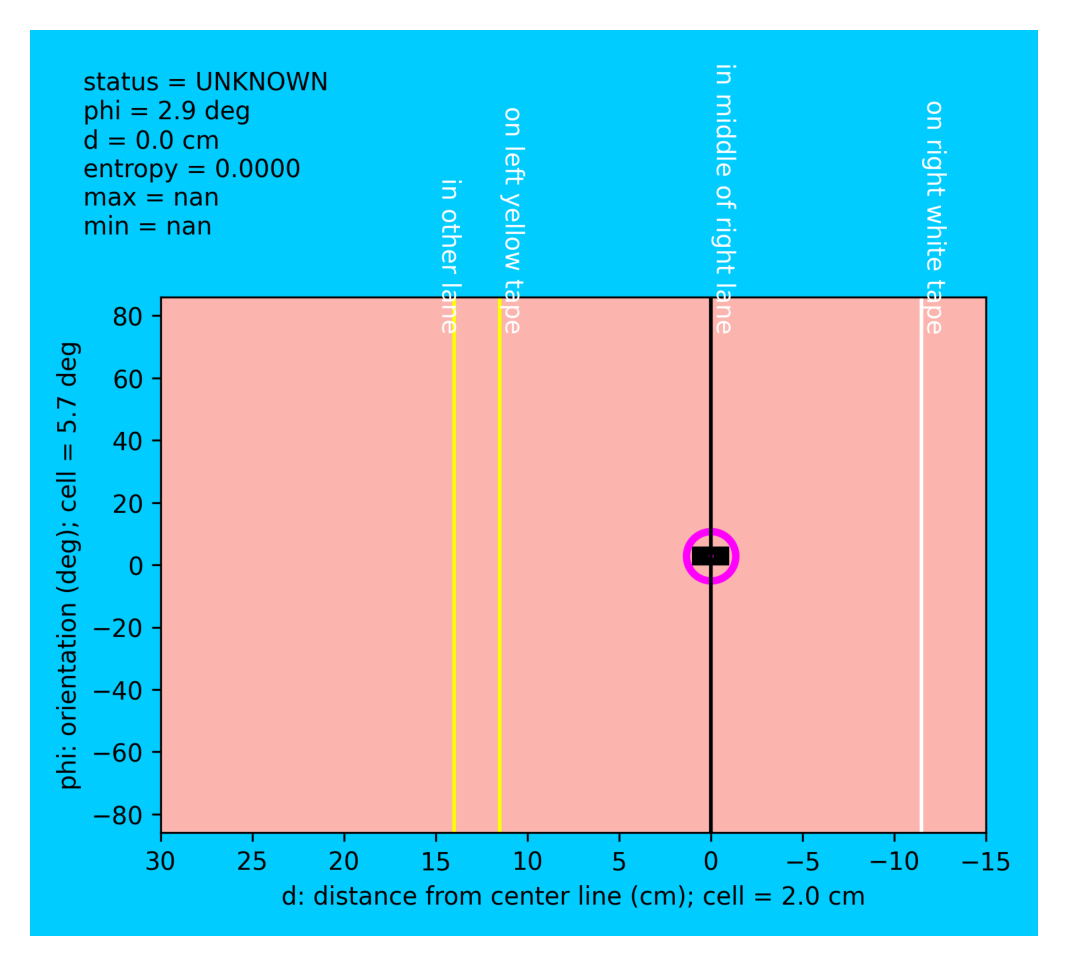

In [4]:
%matplotlib inline
matplotlib.rc("figure", dpi=300)

# create simple observation
d_hat, phi_hat = run_filter(0, 0)

# plot belief
bgr = plot_belief(filter, filter.belief, phi_hat, d_hat, dpi=300)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(rgb)

In [ ]:
# def on_lateral_shift_change(lshift: float):
#     print(lshift)

# interact(on_lateral_shift_change, x=(0.0,10.0,0.01))


def on_lateral_shift_change(x: float):
    # create simple observation
    d_hat, phi_hat = run_filter(x, 0)

    # plot belief
    bgr = plot_belief(filter, filter.belief, phi_hat, d_hat, dpi=300)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

    plt.axis('off')
    plt.imshow(rgb)

interact(on_lateral_shift_change, x=widgets.FloatSlider(min=-0.3, max=0.15, step=0.01, value=0))